## Import Dataset and Pre-Processing

In [57]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
plt.style.use('seaborn-whitegrid')
import numpy as np
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from IPython.display import Image  
import pydotplus
import os

df = pd.read_csv("Titanic.csv")
df = df[['pclass', 'sex', 'age','sibsp','survived']] 
df['pclass'] = df['pclass'].map({'1st':1,'2nd':2,'3rd':3})
df['sex'] = df['sex'].map({'male':0,'female':1})
df['age'].fillna((df['age'].mean()),inplace=True) # Inplace will replace NA with Mean
df = df.dropna()
print (df.head())

   pclass  sex      age  sibsp  survived
0       1    1  29.0000      0         1
1       1    0   0.9167      1         1
2       1    1   2.0000      1         0
3       1    0  30.0000      1         0
4       1    1  25.0000      1         0


In [58]:
X = df.drop('survived',axis=1)
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [59]:
decisiontree = DecisionTreeClassifier()
decisiontree = decisiontree.fit(X_train, y_train)
y_predict = decisiontree.predict(X_test)

print("Accuracy: ",accuracy_score(y_test, y_predict))

print(classification_report(y_test, y_predict))

Accuracy:  0.7557251908396947
              precision    recall  f1-score   support

           0       0.72      0.90      0.80       144
           1       0.82      0.58      0.68       118

    accuracy                           0.76       262
   macro avg       0.77      0.74      0.74       262
weighted avg       0.77      0.76      0.75       262



## Plot Graph

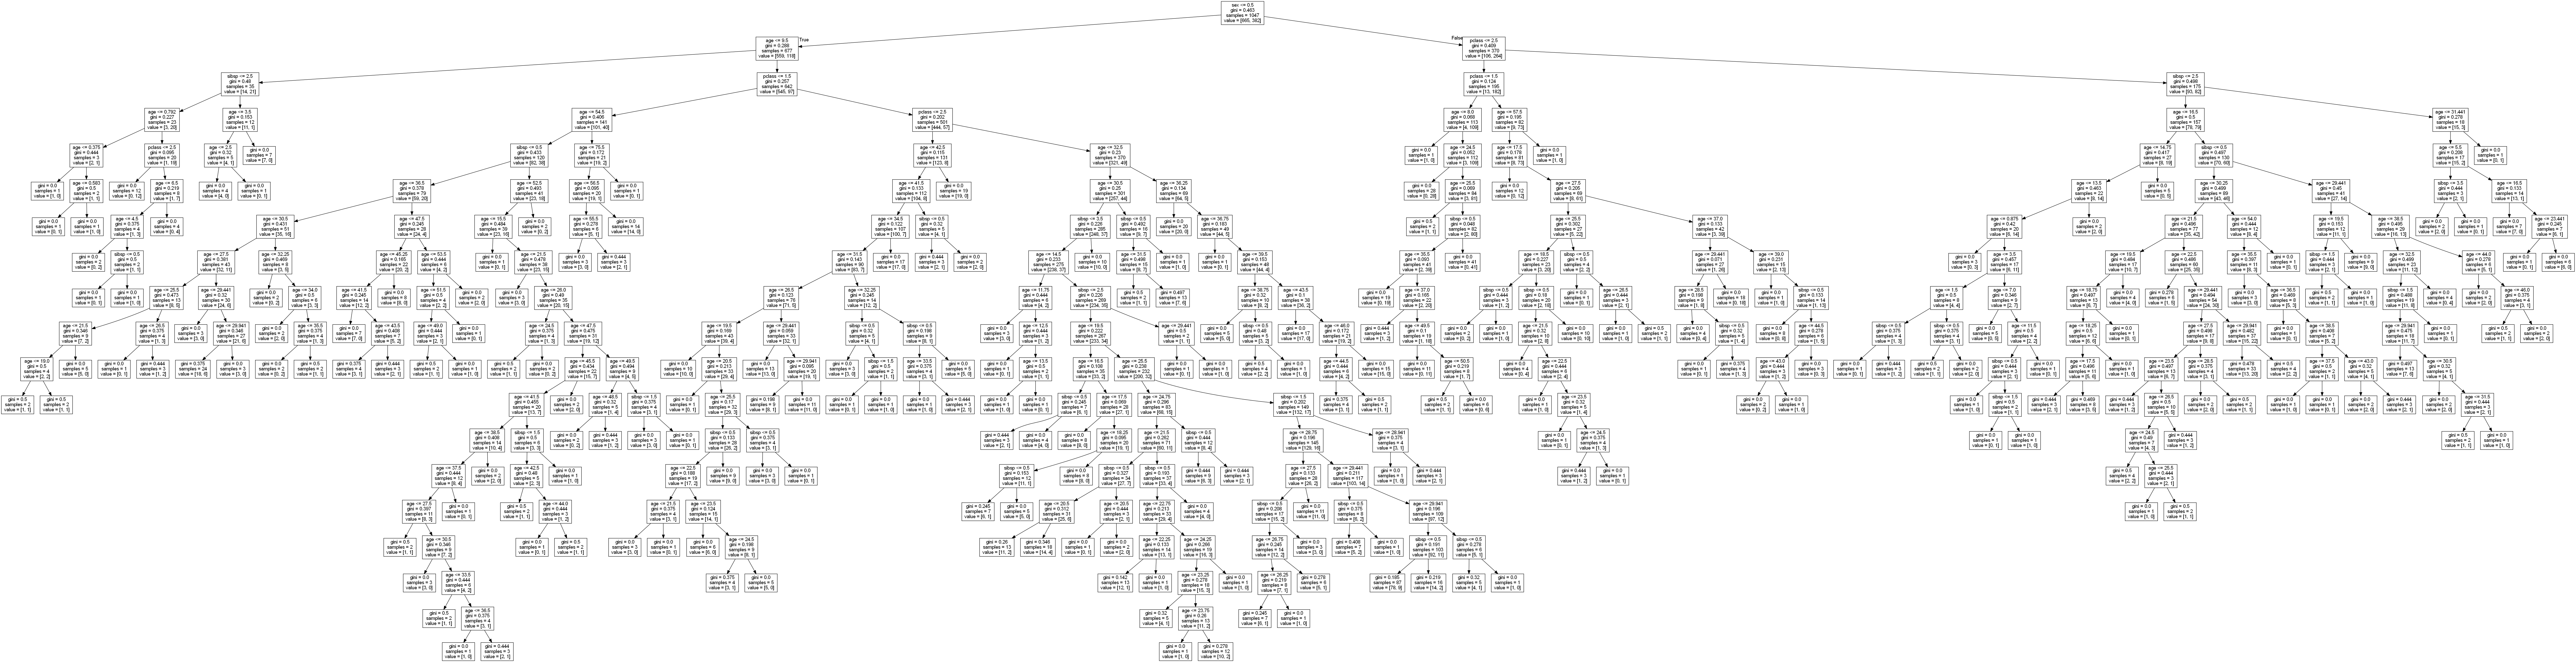

In [54]:

data = export_graphviz(decisiontree, feature_names=X_train.columns)
graph = pydotplus.graph_from_dot_data(data)
Image(graph.create_png())

#plotGraph(decisiontree);


## Apply GridSearchCV to Prune the tree

In [60]:
from sklearn.model_selection import GridSearchCV
parameters = {
    'criterion': ['gini','entropy'],
    'max_leaf_nodes': [2,3,4,5,6,7,8,9,10,11],
}

decisionTreeClassifier = DecisionTreeClassifier();

gridSearch = GridSearchCV(estimator=decisionTreeClassifier,
                     param_grid=parameters,
                     scoring='accuracy',
                     cv=5)

gridSearch.fit(X_train, y_train)
best_parameters = gridSearch.best_params_;

best_parameters


{'criterion': 'gini', 'max_leaf_nodes': 7}

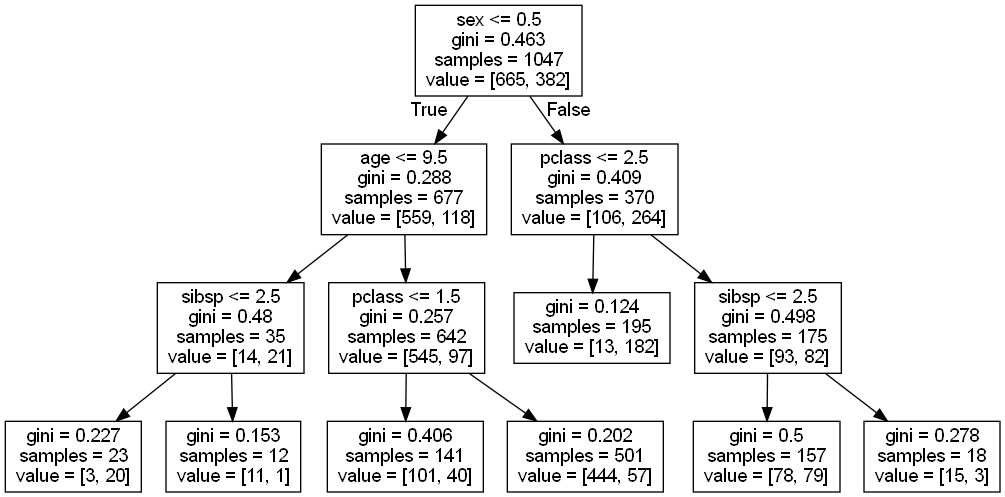

In [61]:
pruned_classifier = DecisionTreeClassifier(criterion='gini',max_depth=3,max_leaf_nodes=7)
pruned_classifier = pruned_classifier.fit(X_train, y_train)

data = export_graphviz(pruned_classifier, feature_names=X_train.columns)
graph = pydotplus.graph_from_dot_data(data)
Image(graph.create_png())

In [62]:
y_predict = pruned_classifier.predict(X_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.76      0.88      0.82       144
           1       0.81      0.67      0.73       118

    accuracy                           0.78       262
   macro avg       0.79      0.77      0.78       262
weighted avg       0.79      0.78      0.78       262



## Accuracy for Pruned Tree

In [63]:
confusion_matrix_test = confusion_matrix(y_test, y_predict)
TN = confusion_matrix_test[0][0]
FN = confusion_matrix_test[1][0]
TP = confusion_matrix_test[1][1]
FP = confusion_matrix_test[0][1]
sensitivity_test = TP/(TP+FN)
specificity_test = TN/(FP+TN)

print("percent survivors correctly predicted (testing set): {0:.2f}%\n".format(sensitivity_test*100))
print("percent fatalities correctly predicted (testing set): {0:.2f}%\n".format(specificity_test*100))

percent survivors correctly predicted (testing set): 66.95%

percent fatalities correctly predicted (testing set): 87.50%



## RandomForestClassifier

In [71]:
from sklearn.ensemble import RandomForestClassifier

random_forest_classifier = RandomForestClassifier(n_estimators = 50, max_leaf_nodes=7)
random_forest_classifier = random_forest_classifier.fit(X_train, y_train)

y_predict = random_forest_classifier.predict(X_test)

print("Accuracy: ",accuracy_score(y_test, y_predict))
print(classification_report(y_test, y_predict))


Accuracy:  0.767175572519084
              precision    recall  f1-score   support

           0       0.74      0.89      0.81       144
           1       0.82      0.62      0.71       118

    accuracy                           0.77       262
   macro avg       0.78      0.75      0.76       262
weighted avg       0.78      0.77      0.76       262



In [72]:
confusion_matrix_random = confusion_matrix(y_test, y_predict)
TN = confusion_matrix_random[0][0]
FN = confusion_matrix_random[1][0]
TP = confusion_matrix_random[1][1]
FP = confusion_matrix_random[0][1]
sensitivity_test = TP/(TP+FN)
specificity_test = TN/(FP+TN)

print("percent survivors correctly predicted (testing set): {0:.2f}%\n".format(sensitivity_test*100))
print("percent fatalities correctly predicted (testing set): {0:.2f}%\n".format(specificity_test*100))

percent survivors correctly predicted (testing set): 61.86%

percent fatalities correctly predicted (testing set): 88.89%

